## 1. 데이터 불러오기 및 기본 정보 확인

#### 1-1. 데이터 불러오기

In [114]:
# 데이터 불러오기
import pandas as pd
from pathlib import Path

# === CSV 경로 설정 ===
DATA_PATH = Path("train.csv")
 
# 파일 존재 확인
if not DATA_PATH.exists():
    raise FileNotFoundError(f"파일을 찾을 수 없습니다: {DATA_PATH.resolve()}")

# 읽어오기
df = pd.read_csv(DATA_PATH)

---

#### 1-2. 데이터 구조 확인

shape 속성을 이용하면 데이터프레임의 행(row)과 열(column) 개수를 확인할 수 있다.

In [115]:
print("- shape :", df.shape)                 

- shape : (891, 12)


info() 메서드를 이용하면 데이터프레임의 전체 구조를 요약 확인할 수 있다. (행 개수, 컬럼 이름, 데이터 타입, 결측치 개수, 메모리 사용량 등)

In [116]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


이 데이터셋은 891행 12열로 구성되어 있으며, 정수형 5개, 실수형 2개, 문자형 5개의 컬럼을 포함하고 있다.  
Age, Cabin, Embarked 열에는 결측치가 존재하며, 나머지 열은 모두 값이 채워져 있다. 전체 데이터 크기는 약 83.7KB로 작은 편이다.

---

#### 1-3. 데이터 요약 통계 확인

describe() 메서드는 기본적으로 수치형 컬럼에 대한 요약 통계를 제공하며, include='object' 옵션을 주면 범주형(object) 컬럼에 대한 통계도 확인할 수 있다.

In [117]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


아래 코드는 select_dtypes() 메서드를 이용해 데이터 타입(dtype) 에 따라 컬럼을 자동 분리한다.

In [119]:
import numpy as np

# 숫자/범주형 컬럼 자동 분리
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("수치형 컬럼 :", num_cols)
print("범주형 컬럼 :", cat_cols)

수치형 컬럼 : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
범주형 컬럼 : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


``df[num_cols].describe()`` = ``df.describe()``  

``df[cat_cols].describe()`` = ``df.describe(include='object')``

describe()는 컬럼의 자료형에 따라 요약 통계를 다르게 보여주며, 옵션으로 타입 조건을 지정할 수도 있다.  
``df[num_cols].describe()``는 수치형 컬럼만 선택해서 통계를 내므로 ``df.describe()``와 동일한 결과를,  
``df[cat_cols].describe()``는 범주형 컬럼만 선택해서 통계를 내므로 ``df.describe(include='object')``와 동일한 결과를 반환한다.

In [120]:
# 결과를 보려면 아래 코드 주석 지우고 실행
# df[num_cols].describe()

In [121]:
# 결과를 보려면 아래 코드 주석 지우고 실행
# df[cat_cols].describe()

---

## 2. 데이터 이해

#### 2-1. 컬럼별 의미 설명

다음은 데이터프레임의 전체 컬럼 이름을 리스트로 출력하는 코드이다.

In [122]:
print("columns :", df.columns.tolist())    

columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


| 컬럼명             | 설명                                                           |
| --------------- | ------------------------------------------------------------ |
| **PassengerId** | 승객 고유 ID (단순 번호, 분석에는 크게 의미 없음)                              |
| **Survived**    | 생존 여부 (타깃 변수) → `0 = 사망`, `1 = 생존`                           |
| **Pclass**      | 선실 등급 (사회적/경제적 지위 지표) → `1 = 1등석`, `2 = 2등석`, `3 = 3등석`      |
| **Name**        | 승객 이름 (이름, 성, 호칭(title) 포함. Feature Engineering에서 활용 가능)     |
| **Sex**         | 성별 (`male`, `female`)                                        |
| **Age**         | 나이 (일부 결측치 존재)                                               |
| **SibSp**       | 함께 탑승한 형제/자매(sibling) + 배우자(spouse) 수                        |
| **Parch**       | 함께 탑승한 부모(parent) + 자녀(children) 수                           |
| **Ticket**      | 티켓 번호 (패턴 추출 가능하나 일반적으로는 크게 사용하지 않음)                         |
| **Fare**        | 운임 요금 (탑승 등급/선실 위치와 관련)                                      |
| **Cabin**       | 선실 번호 (결측치 많음. 선실의 앞 글자 = 구역 정보로 활용 가능)                      |
| **Embarked**    | 탑승 항구 → `C = Cherbourg`, `Q = Queenstown`, `S = Southampton` |

---
#### 2-2 결측치 확인

데이터프레임의 각 컬럼별 결측치 개수(missing_num)와 결측치 비율(missing_pct)을 계산해, 결측치가 많은 순서대로 정리하는 코드

In [123]:
print("[결측치 요약]")

# 각 컬럼별 결측치 개수를 구하고 정리
missing = (
    df.isna()                               # 각 셀마다 결측치면 True, 아니면 False 반환
      .sum()                                # 컬럼별로 True 개수 합산 → 컬럼별 결측치 개수
      .rename("missing_num")                # 결과 Series 이름을 "missing_num"으로 바꿔줌
      .to_frame()                           # Series → DataFrame으로 변환 (컬럼명 : missing_num)
)

# 결측치 비율(%) 컬럼 추가
missing["missing_pct"] = (missing["missing_num"] / len(df) * 100).round(2)  # 전체 행 개수 대비 결측치 비율 계산 (소수 둘째자리 반올림)

# 결측치 개수가 많은 순으로 정렬해서 출력
print(missing.sort_values("missing_num", ascending=False))  # missing_num 기준 내림차순 정렬 후 출력

[결측치 요약]
             missing_num  missing_pct
Cabin                687        77.10
Age                  177        19.87
Embarked               2         0.22
PassengerId            0         0.00
Name                   0         0.00
Pclass                 0         0.00
Survived               0         0.00
Sex                    0         0.00
Parch                  0         0.00
SibSp                  0         0.00
Fare                   0         0.00
Ticket                 0         0.00


Cabin : 결측치 687건 (77.1%) → 데이터의 3/4 이상 비어 있음 → 그대로 쓰기 어렵고, 보통 “결측 처리/특정 정보만 추출(앞 글자)”로 활용

Age : 결측치 177건 (19.9%) → 약 20% 비어 있음 → 평균/중앙값 대체 or 모델 기반 보간 필요

Embarked : 결측치 2건 (0.22%) → 거의 없음 → 최빈값 등으로 쉽게 대체 가능

나머지 컬럼 : 결측치 없음

---

#### 2-3 중복 데이터 여부 확인

In [124]:
print("[중복 확인]")

# 전체 데이터에서 완전히 같은 행(모든 컬럼 값이 동일)의 개수를 확인
dup_rows = df.duplicated().sum()
print(f"전체 중복 행 수 : {dup_rows}")

print("\n[PassengerId 제외한 중복 확인]")

if "PassengerId" in df.columns:
    # PassengerId 컬럼을 제외하고 중복 확인
    dup_except_id = df.drop(columns=["PassengerId"]).duplicated().sum()
    print(f"PassengerId 제외 시 중복 행 수 : {dup_except_id}")

    if dup_except_id > 0:
        print("\n[중복된 데이터 샘플]")
        print(df.drop(columns=["PassengerId"])[df.drop(columns=["PassengerId"]).duplicated(keep=False)].head())

print("\n[티켓번호 + 이름 중복 확인]")

# Ticket과 Name 컬럼이 모두 존재할 경우에만 실행
if set(["Ticket", "Name"]).issubset(df.columns):
    # Ticket + Name 조합이 중복된 행 개수 계산
    dup_ticket_name = df.duplicated(subset=["Ticket", "Name"]).sum()
    print(f"Ticket + Name이 동시에 중복된 행 수 : {dup_ticket_name}")

    # 중복된 데이터가 실제로 있다면 샘플로 몇 개 출력
    if dup_ticket_name > 0:
        print("\n[중복된 데이터 샘플]")
        # keep=False → 중복된 행 전체를 표시 (첫 번째만 제외하지 않음)
        print(df[df.duplicated(subset=["Ticket", "Name"], keep=False)].head())

[중복 확인]
전체 중복 행 수 : 0

[PassengerId 제외한 중복 확인]
PassengerId 제외 시 중복 행 수 : 0

[티켓번호 + 이름 중복 확인]
Ticket + Name이 동시에 중복된 행 수 : 0


본 데이터셋에는 단순히 순번을 매긴 `PassengerId` 컬럼이 존재하므로, 모든 컬럼이 완전히 동일한 중복 행은 나타날 수 없다.  
따라서 본 프로젝트에서는 `PassengerId`를 제외한 나머지 컬럼을 기준으로 중복 여부를 확인하였다.  
또한, `Ticket`과 `Name`이 동시에 중복되는 경우 동일 인물일 가능성이 있어 추가로 확인했으나, 해당 사례는 존재하지 않는 것으로 확인되었다.

---

## 3. 데이터 분포 확인 

#### 3-1. 타깃 데이터 분포

In [ ]:
print("[타깃 분포]")

# 타깃 컬럼이 데이터에 존재할 때만 실행
if "Survived" in df.columns:
    # 각 클래스(0: 사망, 1: 생존)의 개수 세기
    # dropna=False → 결측치(NaN)가 있으면 그것도 개수에 포함 (데이터 품질 점검을 위해)
    print(df["Survived"].value_counts(dropna=False))

    print("\n[타깃 분포 비율]")
    # 각 클래스의 상대적 비율 계산
    # normalize=True → 전체 대비 비율 반환 (합계 = 1)
    # round(3) → 소수점 셋째 자리까지 반올림
    print(df["Survived"].value_counts(normalize=True).round(3))

[타깃 분포]
Survived
0    549
1    342
Name: count, dtype: int64

[타깃 분포 비율]
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64


[타깃 분포 시각화]


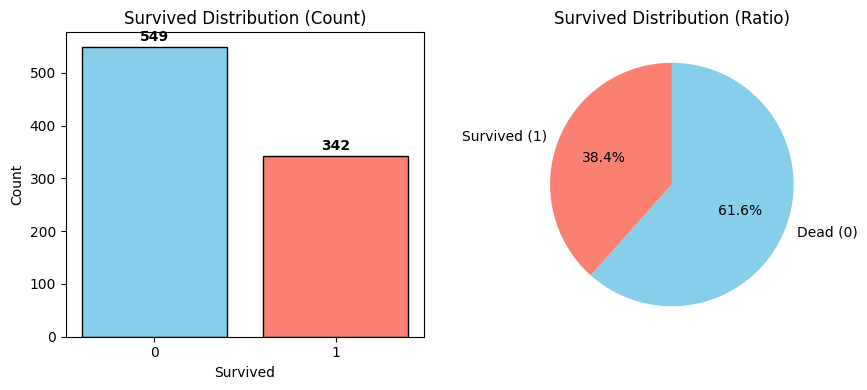

In [133]:
import matplotlib.pyplot as plt

print("[타깃 분포 시각화]")

if "Survived" in df.columns:
    counts = df["Survived"].value_counts().sort_index()             # 클래스 개수 (0, 1 순서 정렬)
    ratios = df["Survived"].value_counts(normalize=True).sort_index()  # 클래스 비율

    # subplot 생성 (1행 2열)
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))

    # --- (1) 막대그래프 (개수) ---
    colors = ["skyblue", "salmon"]  # 클래스별 색상 통일
    bars = axes[0].bar(counts.index.astype(str), counts.values, color=colors, edgecolor="black")
    axes[0].set_title("Survived Distribution (Count)")
    axes[0].set_xlabel("Survived")
    axes[0].set_ylabel("Count")

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                     ha="center", va="bottom", fontsize=10, fontweight="bold")

    # --- (2) 파이차트 (비율) ---
    axes[1].pie(
        ratios.values,
        labels=["Dead (0)", "Survived (1)"],
        autopct="%.1f%%",           # 퍼센트 표시
        colors=colors,              # 막대그래프와 동일 색상
        startangle=90,
        counterclock=False
    )
    axes[1].set_title("Survived Distribution (Ratio)")

    plt.tight_layout()
    plt.show()


분석 결과, 타이타닉 승객의 약 62%가 사망했고 38%가 생존했으며, 데이터는 다소 불균형하지만 심각한 수준은 아니다.

---

#### 3-2. 